In [31]:
import requests
import pandas as pd


### API Keys

Many APIs use a _key_ or _token_ to identify the user. For instance, The Guardian, a British newspaper, provides a [web API](https://open-platform.theguardian.com/) to access their news articles. You need an API key to use their web APIs. You can get one for free [here](https://bonobo.capi.gutools.co.uk/register/developer).

#### Storing API Keys

Your API key is private and your responsibility. Treat it like a password. Keep it secret! 

In order to keep your API key separate from your code:
1. Save the API key in a text file.
2. Use Python to load the API key into a variable.

Python's built-in `open()` function opens a file, and the `.readline()` method reads a line from a file. Often you'll see these used with `with`, which automatically closes the file at the end of the block:

In [16]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

In [ ]:
key = read_key("../keys/guardian.txt") # Don't print out your actual API key

In [17]:
type(key)

str

Now you can use the `key` variable anywhere you need the actual API key.

#### Querying The Guardian

We've got our key, so let's use The Guardian API. 

We want to answer the question whether Biden or Trump get more newspaper coverage in the days leading up to the 2020 U.S. presidential election. Let's start by trying to get all of the articles about one of the candidates.

In [18]:
response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": "Biden",
        "from-date": "2020-11-01",
        "to-date": "2020-11-10",
        "page-size": 50,
        "order_by": "newest",
        "page": 1
    }) # try page 12

In [19]:
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [20]:
response.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 475,
  'startIndex': 1,
  'pageSize': 50,
  'currentPage': 1,
  'pages': 10,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2020/nov/05/biden-edges-closer-to-victory',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2020-11-05T05:38:22Z',
    'webTitle': 'US election briefing for Australia: Biden edges closer to victory',
    'webUrl': 'https://www.theguardian.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'us-news/2020/nov/08/donald-trump-concede-legal-challenge-republicans-joe-biden-golf',
    'type': 'article',
    'sectionId': 'us-news',
    'sectionName': 'US news',
    'webPublicationDate': '2020-11-08T19:39:23Z',


In [22]:
import time
def get_articles(q, page = 1, from_date = "2020-11-01"):
    time.sleep(0.05) 
    response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": q,
        "from-date": from_date,
        "to-date": "2020-11-10",
        "page-size": 50,
        "order_by": "newest", 
        "page": page
    })
    response.raise_for_status()
    return response.json()["response"]

In [55]:
biden = get_articles("Biden")

In [54]:
biden

day  day_name 
1    Sunday       29
2    Monday       26
3    Tuesday      50
4    Wednesday    60
5    Thursday     36
6    Friday       42
7    Saturday     51
8    Sunday       71
9    Monday       59
10   Tuesday      51
dtype: int64

In [26]:
currentPage = biden["currentPage"]
currentPage

1

In [56]:
results = biden["results"]
for p in range(2, pages + 1):
    results += get_articles("biden", p)["results"]

In [28]:
results

[{'id': 'australia-news/2020/nov/05/biden-edges-closer-to-victory',
  'type': 'article',
  'sectionId': 'australia-news',
  'sectionName': 'Australia news',
  'webPublicationDate': '2020-11-05T05:38:22Z',
  'webTitle': 'US election briefing for Australia: Biden edges closer to victory',
  'webUrl': 'https://www.theguardian.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
  'apiUrl': 'https://content.guardianapis.com/australia-news/2020/nov/05/biden-edges-closer-to-victory',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'us-news/2020/nov/08/donald-trump-concede-legal-challenge-republicans-joe-biden-golf',
  'type': 'article',
  'sectionId': 'us-news',
  'sectionName': 'US news',
  'webPublicationDate': '2020-11-08T19:39:23Z',
  'webTitle': 'Republicans back Trump challenge to Biden election victory',
  'webUrl': 'https://www.theguardian.com/us-news/2020/nov/08/donald-trump-concede-legal-challenge-republicans-joe-biden-golf',
  'apiUrl':

In [29]:
type(results)

list

In [58]:
df = pd.DataFrame(results)

In [59]:
df.shape

(475, 11)

Checking the last few entries that we got: Seems like the time column is a little weird, and we can fix that

In [60]:
df.tail()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
470,world/live/2020/nov/10/coronavirus-live-news-w...,liveblog,world,World news,2020-11-10T23:55:55Z,Greek football players attend 'coronavirus par...,https://www.theguardian.com/world/live/2020/no...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News
471,world/live/2020/nov/06/coronavirus-live-news-u...,liveblog,world,World news,2020-11-07T00:21:25Z,"France reports record 60,486 new cases; Russia...",https://www.theguardian.com/world/live/2020/no...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News
472,business/live/2020/nov/10/uk-unemployment-redu...,liveblog,business,Business,2020-11-10T17:14:20Z,FTSE 100 vaccine rally continues; UK unemploym...,https://www.theguardian.com/business/live/2020...,https://content.guardianapis.com/business/live...,False,pillar/news,News
473,australia-news/live/2020/nov/02/australia-coro...,liveblog,australia-news,Australia news,2020-11-02T08:27:07Z,Ministers pay tribute to Christine Holgate – a...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,pillar/news,News
474,world/live/2020/nov/03/vienna-austria-synagogu...,liveblog,world,World news,2020-11-03T13:32:50Z,Vienna shooting: fourth victim dies as police ...,https://www.theguardian.com/world/live/2020/no...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News


In [63]:
df["webPublicationDate"] = pd.to_datetime(df["webPublicationDate"])

In [64]:
type(df["webPublicationDate"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [65]:
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,australia-news/2020/nov/05/biden-edges-closer-...,article,australia-news,Australia news,2020-11-05 05:38:22+00:00,US election briefing for Australia: Biden edge...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,False,pillar/news,News
1,us-news/2020/nov/08/donald-trump-concede-legal...,article,us-news,US news,2020-11-08 19:39:23+00:00,Republicans back Trump challenge to Biden elec...,https://www.theguardian.com/us-news/2020/nov/0...,https://content.guardianapis.com/us-news/2020/...,False,pillar/news,News
2,politics/2020/nov/10/johnsons-biden-win-tweet-...,article,politics,Politics,2020-11-10 13:19:16+00:00,Johnson's Biden win tweet contains hidden Trum...,https://www.theguardian.com/politics/2020/nov/...,https://content.guardianapis.com/politics/2020...,False,pillar/news,News
3,us-news/live/2020/nov/07/us-election-joe-biden...,liveblog,us-news,US news,2020-11-08 10:04:24+00:00,Biden addresses Americans after victory – as i...,https://www.theguardian.com/us-news/live/2020/...,https://content.guardianapis.com/us-news/live/...,False,pillar/news,News
4,world/2020/nov/09/monday-briefing-biden-to-mak...,article,world,World news,2020-11-09 06:24:26+00:00,Monday briefing: Biden to make Covid top priority,https://www.theguardian.com/world/2020/nov/09/...,https://content.guardianapis.com/world/2020/no...,False,pillar/news,News


In [66]:
date = df["webPublicationDate"].dt
date

In [67]:
date.day_name()

0      Thursday
1        Sunday
2       Tuesday
3        Sunday
4        Monday
         ...   
470     Tuesday
471    Saturday
472     Tuesday
473      Monday
474     Tuesday
Name: webPublicationDate, Length: 475, dtype: object

In [40]:
dates = pd.DataFrame({"day": date.day, "day_name": date.day_name()})

In [41]:
dates

,day,day_name
0,5,Thursday
1,8,Sunday
2,10,Tuesday
3,8,Sunday
4,9,Monday
...,...,...
470,10,Tuesday
471,7,Saturday
472,10,Tuesday
473,2,Monday


In [42]:
dates.groupby(["day", "day_name"]).size()

day  day_name 
1    Sunday       30
2    Monday       26
3    Tuesday      47
4    Wednesday    61
5    Thursday     44
6    Friday       45
7    Saturday     51
8    Sunday       68
9    Monday       55
10   Tuesday      48
dtype: int64

Write it as a function

In [43]:
def get_articles(q, page = 1):
    response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": q,
        "from-date": "2020-11-01",
        "to-date": "2020-11-10",
        "page-size": 50,
        "page": page
    })
    response.raise_for_status()
    return response.json()["response"]

In [44]:
def get_all_articles(q, time_sleep = 0.05):
    # Get the first page, and find out how many pages there are.
    candidate = get_articles(q)
    pages = candidate["pages"]

    # Loop over remaining pages.
    results = candidate["results"]
    for p in range(2, pages + 1):
        results += get_articles(q, p)["results"]
        time.sleep(time_sleep)

    # Convert the articles to data frame, and the date column to a date.
    df = pd.DataFrame(results)
    df["webPublicationDate"] = pd.to_datetime(df["webPublicationDate"])
    
    # Get the day and day name, then count them.
    date = df["webPublicationDate"].dt
    dates = pd.DataFrame({"day": date.day, "day_name": date.day_name()})
    return dates.groupby(["day", "day_name"]).size()

In [45]:
biden=get_all_articles("Biden")
biden

day  day_name 
1    Sunday       29
2    Monday       26
3    Tuesday      50
4    Wednesday    60
5    Thursday     36
6    Friday       42
7    Saturday     51
8    Sunday       71
9    Monday       59
10   Tuesday      51
dtype: int64

In [46]:
biden.head(10)

day  day_name 
1    Sunday       29
2    Monday       26
3    Tuesday      50
4    Wednesday    60
5    Thursday     36
6    Friday       42
7    Saturday     51
8    Sunday       71
9    Monday       59
10   Tuesday      51
dtype: int64

In [47]:
trump=get_all_articles("Trump")
trump

day  day_name 
1    Sunday       46
2    Monday       39
3    Tuesday      59
4    Wednesday    65
5    Thursday     46
6    Friday       51
7    Saturday     56
8    Sunday       73
9    Monday       54
10   Tuesday      55
dtype: int64

In [48]:
df = pd.DataFrame([biden,trump]).T
df = df.rename(columns={0: 'Biden', 1: 'Trump'})
df = df.reset_index()
df

,day,day_name,Biden,Trump
0,1,Sunday,29,46
1,2,Monday,26,39
2,3,Tuesday,50,59
3,4,Wednesday,60,65
4,5,Thursday,36,46
5,6,Friday,42,51
6,7,Saturday,51,56
7,8,Sunday,71,73
8,9,Monday,59,54
9,10,Tuesday,51,55


In [49]:
df = df.melt(id_vars = ['day', 'day_name'])
df

,day,day_name,variable,value
0,1,Sunday,Biden,29
1,2,Monday,Biden,26
2,3,Tuesday,Biden,50
3,4,Wednesday,Biden,60
4,5,Thursday,Biden,36
5,6,Friday,Biden,42
6,7,Saturday,Biden,51
7,8,Sunday,Biden,71
8,9,Monday,Biden,59
9,10,Tuesday,Biden,51


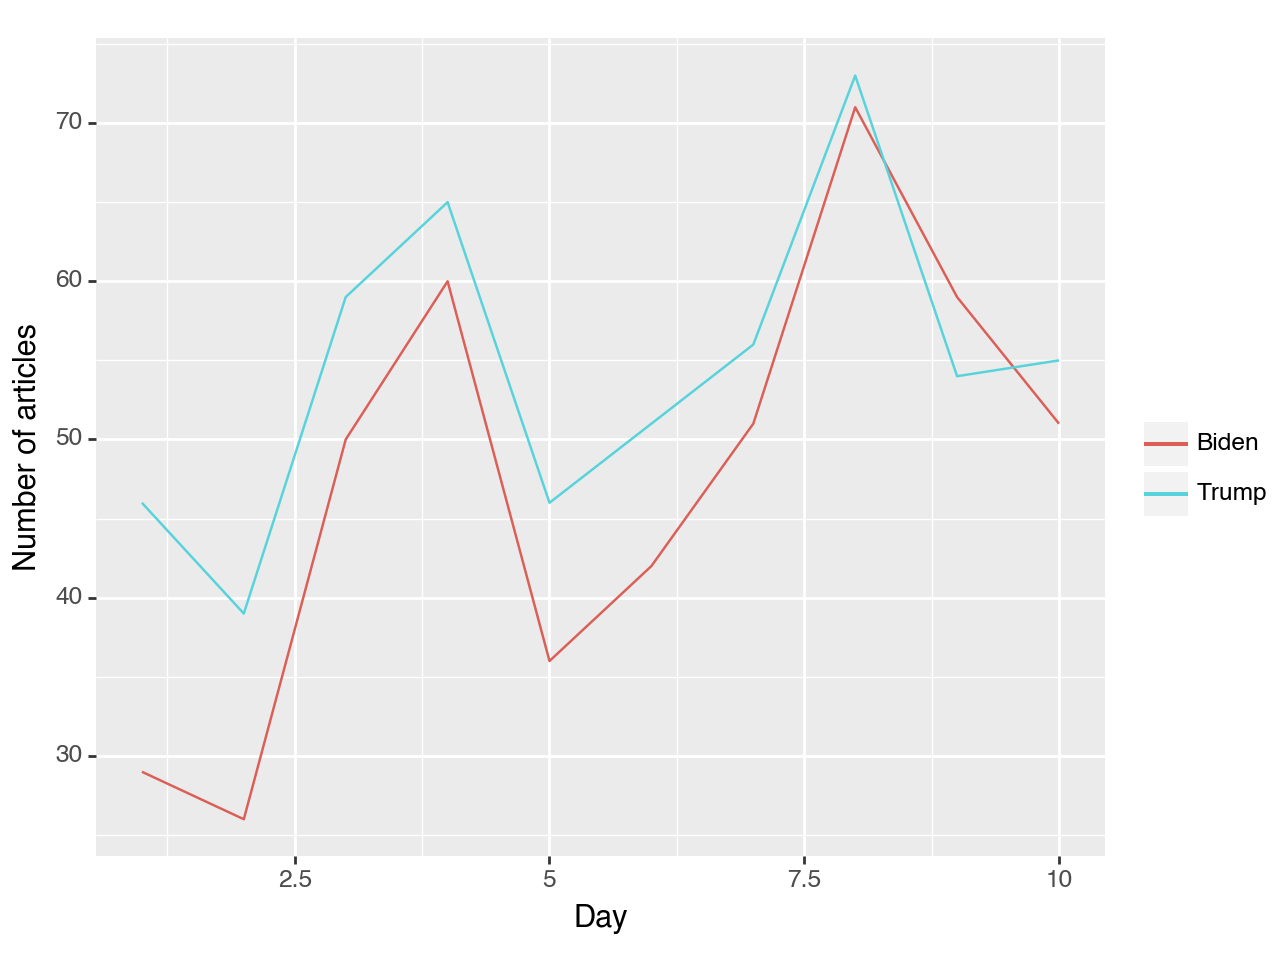

<Figure Size: (640 x 480)>

In [52]:
import plotnine as p9
(
    p9.ggplot(df, p9.aes(x='day',y='value',color='variable')) + 
        p9.geom_line() + 
    p9.labs(color='',x='Day',y='Number of articles')
)

What are some ways this analysis could be improved?

* Check that articles about "Trump" and "Biden" are actually about the two candidates. Some may be about other things -- the English word "trump", "Hunter Biden", etc...
* Check whether the API searches article text or just article titles.
* Use more sources, and use American newspapers (unless the goal was to analyze international news).
* Make visualizations.
* Use a larger time window.
* Use other kinds of data (e.g., poll results) to look for relationships.

Collecting and cleaning data takes a lot of very technical work, but it's only the first step in the analysis. When you finish data collection and cleaning, it can feel like you're finally done. Take a moment to congratulate yourself and step away from the data, so that when you come back you'll be ready to do a careful statistical analysis.

### OAuth

[OAuth](https://en.wikipedia.org/wiki/OAuth) is a way to give an application access to data on a website or web API.

You might run into OAuth if you use a web API where the data is private. For instance, Twitter provides a [web API](https://developer.twitter.com/en/docs.html) for managing your personal Twitter account. If you want to access the API from a Python script, first you have to use OAuth to tell Twitter that the script has permission to use your data.

OAuth can operate in several different ways. As always, check the documentation for the web API you want to use in order to find out what you need to do.

The simplest case of OAuth requires scripts to have a key or token from the web API provider. This is very similar to using an API key.

For more complicated cases, the `requests-ouathlib` package ([docs](https://requests-oauthlib.readthedocs.io/en/latest/)) may help.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 467.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 422.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 473.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 457.7 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.3
    Uninstalling patsy-0.5.3:
      Successfully uninstalled patsy-0.5.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
